reference: 

[Multivariate Time Series Forecasting with LSTMs in Keras](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import os

In [2]:
cwd = os.getcwd()
f_d = '/data/DATA_CME_S1_22012021.csv'

# data

In [3]:
d = pd.read_csv(cwd+f_d)

In [4]:
d.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2021-01-21,1369.00,1387.00,1365.50,1367.50,0.75,1370.25,108662.0,358270.0
1,2021-01-20,1384.50,1384.50,1352.00,1368.75,-16.25,1369.50,171018.0,366235.0
2,2021-01-19,1419.00,1421.25,1383.25,1385.00,-31.00,1385.75,121099.0,374876.0
3,2021-01-15,1432.25,1434.50,1413.50,1424.75,-13.75,1416.75,95665.0,378606.0
4,2021-01-14,1413.00,1413.00,1413.00,1411.75,25.50,1436.50,12.0,52.0


## subset the data since 2010-01-01

In [27]:
df = d[['Date', 'Settle']]
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
df = df[df.loc[:,'Date'] >= '2010-01-01']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [28]:
df.head()

,Date,Settle
0,2021-01-21,1370.25
1,2021-01-20,1369.50
2,2021-01-19,1385.75
3,2021-01-15,1416.75
4,2021-01-14,1436.50


In [29]:
df.tail()

,Date,Settle
2781,2010-01-08,1013.00
2782,2010-01-07,1017.75
2783,2010-01-06,1050.50
2784,2010-01-05,1052.25
2785,2010-01-04,1049.50


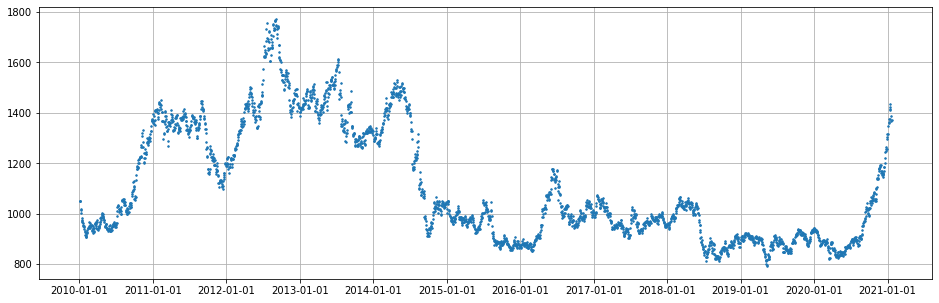

In [47]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 5))
plt.plot_date(x=df.Date, y=df.Settle, ms=1.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.grid()

## convert the TS to supervised ML dataset

reference: 

[How to Convert a Time Series to a Supervised Learning Problem in Python](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)